In [1]:
!pip install --upgrade dagshub mlflow seaborn matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 54.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 92.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 79.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 62.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.0/684.0 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━

In [2]:
import dagshub
dagshub.init(repo_owner='nmach22', repo_name='house-prices-ml', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=e8af7545-46ea-4401-84ec-e2d3745cbe22&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=82dcc01246a48610c824a650f2ed8a6334c71a978c252c68f8e7355fc8dd7029




Output()

Accessing as nmach22

Initialized MLflow to track repo "nmach22/house-prices-ml"

Repository nmach22/house-prices-ml initialized!

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [4]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.width', None)
# pd.set_option('display.expand_frame_repr', False)

In [5]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df.shape

(1460, 81)

In [6]:
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_df.shape

(1459, 80)

In [7]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=40)

In [10]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1168, 80), (292, 80), (1168,), (292,))

In [11]:
X_train

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
609,610,20,RL,61.0,7943,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal
1361,1362,20,RL,124.0,16158,Pave,NaN,IR1,Low,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
1076,1077,50,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,NaN,Shed,500,4,2006,WD,Normal
1138,1139,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
1159,1160,60,RL,76.0,9120,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,1017,20,RL,73.0,11883,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
165,166,190,RL,62.0,10106,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
219,220,120,RL,43.0,3010,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2006,New,Partial


In [12]:
# print column which contains nans:
columns_with_nulls = {}
for column_name, count in X_train.isna().sum(axis=0).items():
    if count > 0:
        print(f'{column_name}: {count} - {X_train[column_name].dtype}')
        columns_with_nulls[column_name] = count

LotFrontage: 212 - float64
Alley: 1104 - object
MasVnrType: 699 - object
MasVnrArea: 7 - float64
BsmtQual: 33 - object
BsmtCond: 33 - object
BsmtExposure: 34 - object
BsmtFinType1: 33 - object
BsmtFinType2: 34 - object
Electrical: 1 - object
FireplaceQu: 540 - object
GarageType: 67 - object
GarageYrBlt: 67 - float64
GarageFinish: 67 - object
GarageQual: 67 - object
GarageCond: 67 - object
PoolQC: 1162 - object
Fence: 937 - object
MiscFeature: 1123 - object


In [64]:
cat_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
num_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']

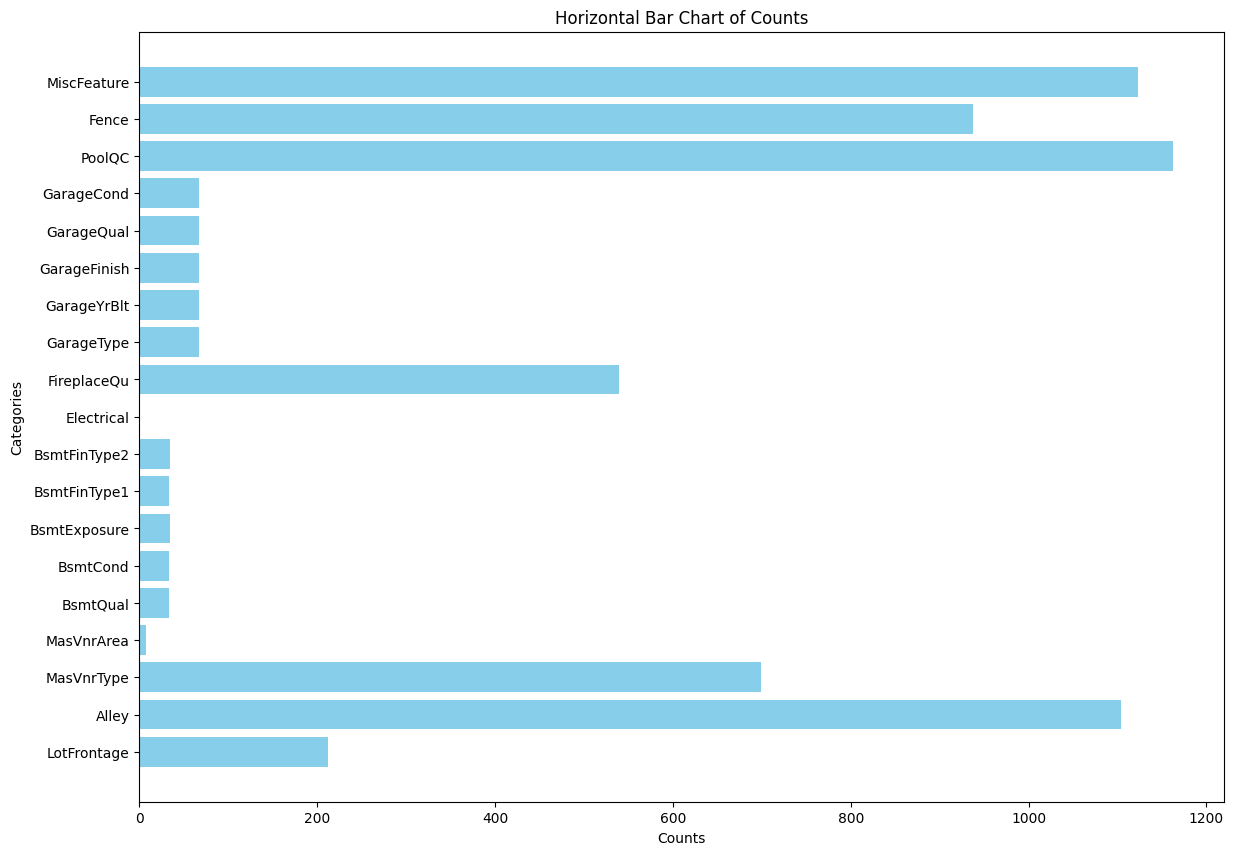

In [65]:
import matplotlib.pyplot as plt

data = columns_with_nulls
# Extract keys (categories) and values (counts)
categories = list(data.keys())
counts = list(data.values())

# Plot the horizontal bar chart
plt.figure(figsize=(14, 10))
plt.barh(categories, counts, color='skyblue')

# Labels and title
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.title('Horizontal Bar Chart of Counts')

# Show the plot
plt.show()

In [62]:
columns_to_remove = ['Id']
columns_to_remove += [col for col, count in columns_with_nulls.items() if count > 500]

In [63]:
columns_to_remove

['Id', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dataframe_distributions(df):
    """
    Plots the distributions of all columns in a pandas DataFrame, 
    separating categorical and numerical columns.

    Args:
        df (pd.DataFrame): The DataFrame to visualize.
    """
    df = df.replace([np.inf, -np.inf], np.nan) #added line to replace inf with nan.

    numerical_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    cols_per_row = 5
    # Plot numerical columns
    if len(numerical_cols) > 0:
        num_plots = len(numerical_cols)
        rows = (num_plots + cols_per_row - 1) // cols_per_row

        plt.figure(figsize=(25, 5 * rows))
        for i, col in enumerate(numerical_cols, 1):
            plt.subplot(rows, cols_per_row, i)
            sns.histplot(df[col], kde=True) #using histplot instead of distplot, distplot is deprecated
            plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()

    # Plot categorical columns
    if len(categorical_cols) > 0:
        num_plots = len(categorical_cols)
        rows = (num_plots + cols_per_row - 1) // cols_per_row

        plt.figure(figsize=(25, 5 * rows))
        for i, col in enumerate(categorical_cols, 1):
            plt.subplot(rows, cols_per_row, i)
            sns.countplot(x=df[col])
            plt.title(f'Count of {col}')
            plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
        plt.tight_layout()
        plt.show()


# Plot the distributions

plot_dataframe_distributions(df)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_target_correlation(df, target_col):
    """
    Plots the correlation between each feature in a DataFrame and a target column.

    For numerical features, it uses scatter plots.
    For categorical features, it uses box plots.

    Args:
        df (pd.DataFrame): The DataFrame to visualize.
        target_col (str): The name of the target column.
    """

    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    cols_per_row = 5
    if target_col not in df.columns:
        print(f"Error: Target column '{target_col}' not found in DataFrame.")
        return

    # Remove the target column from feature lists
    if target_col in numerical_cols:
        numerical_cols.remove(target_col)
    if target_col in categorical_cols:
        categorical_cols.remove(target_col)

    # Plot numerical feature vs. target
    if len(numerical_cols) > 0:
        num_plots = len(numerical_cols)
        rows = (num_plots + cols_per_row - 1) // cols_per_row

        plt.figure(figsize=(25, 5 * rows))
        for i, col in enumerate(numerical_cols, 1):
            plt.subplot(rows, cols_per_row, i)
            sns.regplot(x=df[col], y=df[target_col], scatter_kws={'s':10}) #added regplot
            plt.title(f'{col} vs. {target_col}')
        plt.tight_layout()
        plt.show()

    # Plot categorical feature vs. target
    if len(categorical_cols) > 0:
        num_plots = len(categorical_cols)
        rows = (num_plots + cols_per_row - 1) // cols_per_row

        plt.figure(figsize=(25, 5 * rows))
        for i, col in enumerate(categorical_cols, 1):
            plt.subplot(rows, cols_per_row, i)
            sns.boxplot(x=df[col], y=df[target_col])
            plt.title(f'{col} vs. {target_col}')
            plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Plot feature-target correlations
plot_feature_target_correlation(df, 'SalePrice')

In [67]:
one_hot_columns = list(X_train[cat_cols].nunique().index)
one_hot_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

## Preprocess

In [40]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
enc.set_output(transform="pandas")
enc.fit_transform(X_train[cat_cols])

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_nan,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
609,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1361,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1076,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1138,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1159,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
165,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
219,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder


class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_columns, columns_to_remove):
        self.categorical_columns = list(set(categorical_columns) - set(columns_to_remove))
        self.columns_to_remove = columns_to_remove

        # one hot encoder
        self.enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        self.enc.set_output(transform="pandas")

    def fit(self, X, y):
        self.numerical_columns = [col for col in X.columns if X[col].dtype != 'object' and col != 'Id']

        self.enc.fit(X[self.categorical_columns])
        
        return self

    def transform(self, X):
        X_transformed = X.drop(columns = self.columns_to_remove)
        
        print("***")
        print("Fill NaNs in numerical columns with 0-s")
        X_transformed = X_transformed.fillna(value={col: 0 for col in self.numerical_columns})
        

        print("Preprocessing One Hot Columns")
        one_hot_encoded = self.enc.transform(X_transformed[self.categorical_columns])
        X_transformed = pd.concat([X_transformed.drop(columns=self.categorical_columns), one_hot_encoded], axis=1)

        print("Check Nans")
        assert not X_transformed.isna().any().any()
            
        return X_transformed

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


model = LinearRegression()


y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).squeeze()
pipeline = Pipeline([
    ('preprocess', CustomPreprocessor(categorical_columns=one_hot_columns, columns_to_remove=columns_to_remove)),
    ('scaler', StandardScaler()),
    ('model', model)
])

# Fit the pipeline on the entire training set
pipeline.fit(X_train, y_train_scaled)

preds_test = pipeline.predict(test_df)
preds_validation = pipeline.predict(X_val)
preds_train = pipeline.predict(X_train)

preds_test = y_scaler.inverse_transform(preds_test.reshape(-1, 1))
preds_validation = y_scaler.inverse_transform(preds_validation.reshape(-1, 1))
preds_train = y_scaler.inverse_transform(preds_train.reshape(-1, 1))

***
Fill NaNs in numerical columns with 0-s
Preprocessing One Hot Columns
Check Nans
***
Fill NaNs in numerical columns with 0-s
Preprocessing One Hot Columns
Check Nans
***
Fill NaNs in numerical columns with 0-s
Preprocessing One Hot Columns
Check Nans
***
Fill NaNs in numerical columns with 0-s
Preprocessing One Hot Columns
Check Nans


In [85]:
y_val.mean()

179042.90753424657

In [86]:
preds_validation.mean()

181042.2537954999

In [87]:
preds_test.mean()

179400.37953339025

In [88]:
preds_train.mean()

181390.76797945204

In [89]:
model.coef_

array([-1.89170921e-02,  5.82215265e-03,  1.02317908e-01,  1.13837979e-01,
        7.32808380e-02,  1.30483791e-01,  2.66232681e-02,  2.20535555e-02,
        9.69467853e-02,  8.78966364e-03,  3.32425761e-03,  1.07003450e-01,
        6.96950350e-02,  1.96321948e-01, -1.50624094e-02,  2.11365605e-01,
       -6.49530983e-03, -9.70647317e-03,  1.86879882e-02,  4.02150877e-03,
       -2.42265616e-02, -3.45939849e-02,  5.02699983e-03,  1.50212515e-02,
       -4.79328980e-01,  1.68947528e-02,  8.58112095e-02,  3.04570640e-02,
       -1.33793307e-03, -1.18045016e-03,  6.66799915e-03,  1.69573730e-02,
        4.69485967e-02, -1.93163856e-03, -1.59046382e-02, -1.03098970e-02,
       -2.91433544e-16,  3.09077724e-03,  5.81423247e-02, -5.67059274e-03,
       -2.62554644e-02, -2.45165868e-02, -1.41141178e-02,  1.41141178e-02,
        1.58748102e-02, -5.08637221e-03, -3.92244161e-03,  4.07231027e-02,
       -1.85371766e-03, -2.45176269e-02, -3.42485381e-02, -1.79362309e-02,
        4.48803138e-02, -

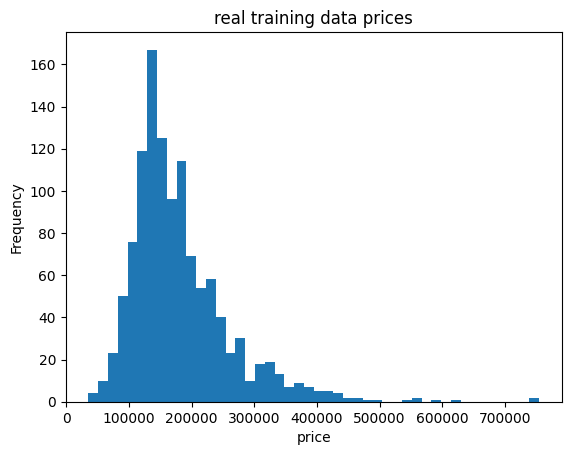

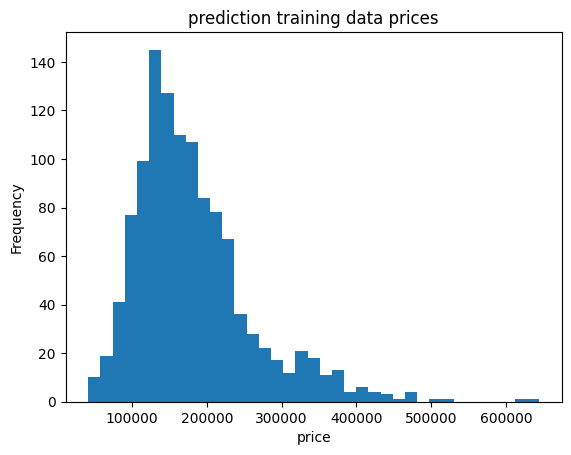

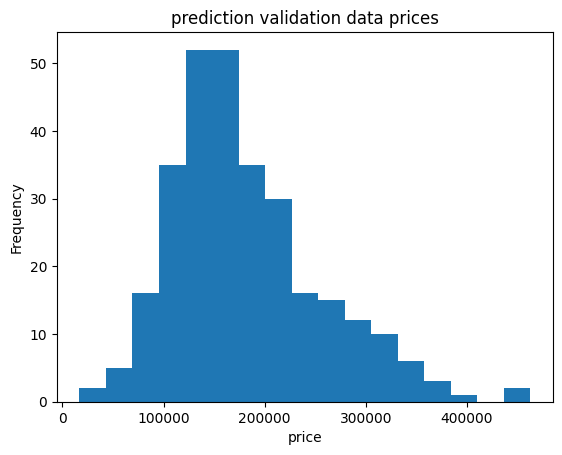

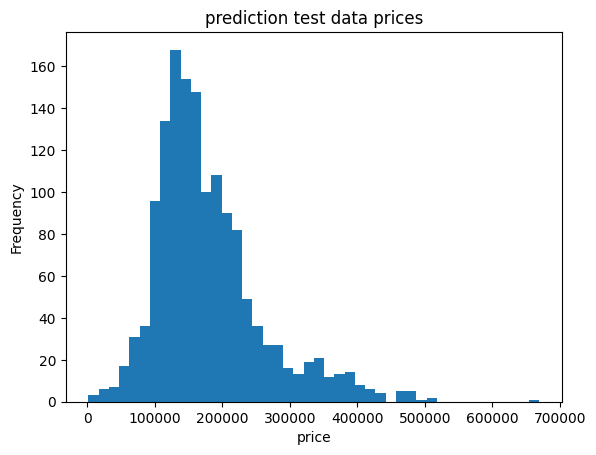

In [90]:
import matplotlib.pyplot as plt

def draw_histogram_auto_bins(data, title="Histogram", xlabel="price", ylabel="Frequency", bin_method='auto'):
    plt.hist(data, bins=bin_method)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

draw_histogram_auto_bins(y_train, title='real training data prices')
draw_histogram_auto_bins(preds_train, title='prediction training data prices')
draw_histogram_auto_bins(preds_validation, title='prediction validation data prices')
draw_histogram_auto_bins(preds_test, title='prediction test data prices')

In [91]:
# Transform the training data to see the scaled result
X_train_transformed = pipeline.named_steps['preprocess'].transform(X_train)
X_train_scaled = pipeline.named_steps['scaler'].transform(X_train_transformed)

# Convert the scaled data to a DataFrame for easier viewing
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_transformed.columns)
X_train_scaled_df

***
Fill NaNs in numerical columns with 0-s
Preprocessing One Hot Columns
Check Nans


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,-0.871658,0.097790,-0.252659,-1.507104,-0.504499,-0.358283,-1.174415,0.490392,0.979082,-0.287698,...,0.811844,-0.101885,-0.248633,-0.071858,-0.595809,-0.246686,-0.18338,-0.097506,-0.713473,0.781687
1,-0.871658,1.887338,0.498726,0.643096,-0.504499,1.110048,0.968512,-0.479820,1.777277,-0.287698,...,0.811844,-0.101885,-0.248633,-0.071858,-0.595809,-0.246686,-0.18338,-0.097506,1.401594,-1.279285
2,-0.165219,0.069384,0.008656,-0.790370,2.223533,-1.192562,0.189266,-0.568021,0.383125,-0.287698,...,0.811844,-0.101885,-0.248633,-0.071858,-0.595809,-0.246686,-0.18338,-0.097506,-0.713473,0.781687
3,-0.871658,-1.634947,-0.081071,-0.073637,-0.504499,0.175656,-0.395169,-0.568021,2.407657,-0.287698,...,0.811844,-0.101885,-0.248633,-0.071858,-0.595809,-0.246686,-0.18338,-0.097506,-0.713473,0.781687
4,0.070261,0.523873,-0.145005,-0.073637,0.404845,0.075542,-0.541277,0.920372,-0.012745,-0.287698,...,0.811844,-0.101885,-0.248633,-0.071858,-0.595809,-0.246686,-0.18338,-0.097506,1.401594,-1.279285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-0.871658,0.438656,0.107713,0.643096,-0.504499,0.809708,0.530186,0.512442,0.520819,-0.287698,...,0.811844,-0.101885,-0.248633,-0.071858,-0.595809,-0.246686,-0.18338,-0.097506,1.401594,-1.279285
1164,3.131496,0.126195,-0.054820,-0.790370,1.314189,-1.059077,0.676294,-0.568021,-0.208528,0.794789,...,-1.231764,-0.101885,-0.248633,-0.071858,-0.595809,4.053743,-0.18338,-0.097506,-0.713473,0.781687
1165,0.070261,-1.634947,-0.029576,0.643096,0.404845,0.042171,-0.589980,0.754995,0.884417,-0.096319,...,0.811844,-0.101885,-0.248633,-0.071858,-0.595809,-0.246686,-0.18338,-0.097506,-0.713473,0.781687
1166,1.483139,-0.413510,-0.703856,0.643096,-0.504499,1.110048,1.017214,-0.479820,-0.929270,-0.287698,...,0.811844,-0.101885,-0.248633,-0.071858,-0.595809,-0.246686,-0.18338,-0.097506,1.401594,-1.279285


In [92]:
X_train_transformed.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
609,20,61.0,7943,4,5,1961,1961,192.0,903,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1361,20,124.0,16158,7,5,2005,2005,16.0,1274,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1076,50,60.0,10800,5,8,1936,1989,0.0,626,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1138,20,0.0,9819,6,5,1977,1977,0.0,1567,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1159,60,76.0,9120,6,6,1974,1974,270.0,442,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [93]:
X_train_scaled_numericals = X_train_scaled_df[list(set(num_cols) - set(['Id']))]
X_train_scaled_numericals

,OverallQual,BedroomAbvGr,WoodDeckSF,Fireplaces,GarageCars,MoSold,LotFrontage,YrSold,LowQualFinSF,FullBath,...,LotArea,BsmtFinSF1,BsmtFullBath,TotalBsmtSF,OverallCond,3SsnPorch,MSSubClass,2ndFlrSF,EnclosedPorch,HalfBath
0,-1.507104,0.174249,-0.230072,-0.965196,-1.010712,-0.878757,0.097790,-0.614908,-0.123494,-1.028393,...,-0.252659,0.979082,1.086130,-0.067266,-0.504499,-0.117729,-0.871658,-0.788740,0.286313,-0.766158
1,0.643096,0.174249,0.590748,0.568612,0.323199,-0.131478,1.887338,0.890778,-0.123494,0.799861,...,0.498726,1.777277,1.086130,1.049542,-0.504499,-0.117729,-0.871658,-0.788740,-0.352538,-0.766158
2,-0.790370,0.174249,2.705938,0.568612,0.323199,-0.878757,0.069384,-1.367751,-0.123494,0.799861,...,0.008656,0.383125,-0.838908,-0.586660,2.223533,-0.117729,-0.165219,0.065157,-0.352538,-0.766158
3,-0.073637,-1.059220,1.348428,2.102421,0.323199,-0.505117,-1.634947,0.890778,-0.123494,0.799861,...,-0.081071,2.407657,1.086130,1.132020,-0.504499,-0.117729,-0.871658,-0.788740,-0.352538,-0.766158
4,-0.073637,1.407718,-0.735192,0.568612,0.323199,0.242162,0.523873,0.137935,-0.123494,0.799861,...,-0.145005,-0.012745,-0.838908,-0.352598,0.404845,-0.117729,0.070261,1.364464,-0.352538,1.209277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,0.643096,0.174249,0.172446,0.568612,0.323199,-0.131478,0.438656,0.890778,-0.123494,0.799861,...,0.107713,0.520819,1.086130,0.991584,-0.504499,-0.117729,-0.871658,-0.788740,-0.352538,-0.766158
1164,-0.790370,1.407718,0.369758,-0.965196,-2.344623,0.989441,0.126195,0.137935,-0.123494,0.799861,...,-0.054820,-0.208528,1.086130,-0.925491,1.314189,-0.117729,3.131496,0.473642,-0.352538,-0.766158
1165,0.643096,0.174249,1.119545,2.102421,0.323199,1.736720,-1.634947,0.890778,-0.123494,0.799861,...,-0.029576,0.884417,1.086130,0.106608,0.404845,-0.117729,0.070261,1.479855,3.382284,1.209277
1166,0.643096,-1.059220,0.117198,-0.965196,0.323199,-1.252396,-0.413510,-1.367751,-0.123494,0.799861,...,-0.703856,-0.929270,-0.838908,0.420919,-0.504499,-0.117729,1.483139,-0.788740,-0.352538,-0.766158


In [95]:
# Transform the training data to see the scaled result
X_test_transformed = pipeline.named_steps['preprocess'].transform(test_df)
X_test_scaled = pipeline.named_steps['scaler'].transform(X_test_transformed)

# Convert the scaled data to a DataFrame for easier viewing
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_transformed.columns)
X_test_scaled_df

***
Fill NaNs in numerical columns with 0-s
Preprocessing One Hot Columns
Check Nans


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,-0.871658,0.637495,0.083840,-0.790370,0.404845,-0.358283,-1.174415,-0.568021,0.043193,0.573507,...,0.811844,-0.101885,-0.248633,-0.071858,-0.595809,-0.246686,-0.18338,-0.097506,-0.713473,0.781687
1,-0.871658,0.665900,0.325765,-0.073637,0.404845,-0.458396,-1.320523,0.027336,1.022111,-0.287698,...,0.811844,-0.101885,-0.248633,-0.071858,-0.595809,-0.246686,-0.18338,-0.097506,-0.713473,0.781687
2,0.070261,0.467062,0.285795,-0.790370,-0.504499,0.843079,0.627591,-0.568021,0.738118,-0.287698,...,0.811844,-0.101885,-0.248633,-0.071858,-0.595809,-0.246686,-0.18338,-0.097506,-0.713473,0.781687
3,0.070261,0.580684,-0.066528,-0.073637,0.404845,0.876450,0.627591,-0.457770,0.331490,-0.287698,...,0.811844,-0.101885,-0.248633,-0.071858,-0.595809,-0.246686,-0.18338,-0.097506,-0.713473,0.781687
4,1.483139,-0.413510,-0.521383,1.359830,-0.504499,0.676223,0.335374,-0.568021,-0.397858,-0.287698,...,0.811844,-0.101885,-0.248633,-0.071858,-0.595809,-0.246686,-0.18338,-0.097506,1.401594,-1.279285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.425057,-1.038431,-0.802089,-1.507104,1.314189,-0.057942,-0.736089,-0.568021,-0.963694,-0.287698,...,-1.231764,-0.101885,-0.248633,-0.071858,-0.595809,4.053743,-0.18338,-0.097506,-0.713473,0.781687
1455,2.425057,-1.038431,-0.805931,-1.507104,-0.504499,-0.057942,-0.736089,-0.568021,-0.421524,-0.287698,...,-1.231764,-0.101885,-0.248633,13.916417,-0.595809,-0.246686,-0.18338,-0.097506,-0.713473,0.781687
1456,-0.871658,2.909937,0.850134,-0.790370,1.314189,-0.391654,0.530186,-0.568021,1.669703,-0.287698,...,-1.231764,-0.101885,-0.248633,-0.071858,1.678390,-0.246686,-0.18338,-0.097506,-0.713473,0.781687
1457,0.658960,0.126195,-0.024180,-0.790370,-0.504499,0.676223,0.335374,-0.568021,-0.238649,-0.287698,...,-1.231764,-0.101885,-0.248633,-0.071858,-0.595809,4.053743,-0.18338,-0.097506,-0.713473,0.781687


In [96]:
X_test_transformed.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [97]:
X_test_scaled_numericals = X_test_scaled_df[list(set(num_cols) - set(['Id']))]
X_test_scaled_numericals

,OverallQual,BedroomAbvGr,WoodDeckSF,Fireplaces,GarageCars,MoSold,LotFrontage,YrSold,LowQualFinSF,FullBath,...,LotArea,BsmtFinSF1,BsmtFullBath,TotalBsmtSF,OverallCond,3SsnPorch,MSSubClass,2ndFlrSF,EnclosedPorch,HalfBath
0,-0.790370,-1.059220,0.369758,-0.965196,-1.010712,-0.131478,0.637495,1.643621,-0.123494,-1.028393,...,0.083840,0.043193,-0.838908,-0.394952,0.404845,-0.117729,-0.871658,-0.788740,-0.352538,-0.766158
1,-0.073637,0.174249,2.366560,-0.965196,-1.010712,-0.131478,0.665900,1.643621,-0.123494,-1.028393,...,0.325765,1.022111,-0.838908,0.601481,0.404845,-0.117729,-0.871658,-0.788740,-0.352538,1.209277
2,-0.790370,0.174249,0.938018,0.568612,0.323199,-1.252396,0.467062,1.643621,-0.123494,0.799861,...,0.285795,0.738118,-0.838908,-0.292411,-0.504499,-0.117729,0.070261,0.829048,-0.352538,1.209277
3,-0.073637,0.174249,2.106108,0.568612,0.323199,-0.131478,0.580684,1.643621,-0.123494,0.799861,...,-0.066528,0.331490,-0.838908,-0.296869,0.404845,-0.117729,0.070261,0.775968,-0.352538,1.209277
4,1.359830,-1.059220,-0.735192,-0.965196,0.323199,-1.999675,-0.413510,1.643621,-0.123494,0.799861,...,-0.521383,-0.397858,-0.838908,0.492252,-0.504499,-0.117729,1.483139,-0.788740,-0.352538,-0.766158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-1.507104,0.174249,-0.735192,-0.965196,-2.344623,-0.131478,-1.038431,-1.367751,-0.123494,-1.028393,...,-0.802089,-0.963694,-0.838908,-1.143949,1.314189,-0.117729,2.425057,0.471334,-0.352538,1.209277
1455,-1.507104,0.174249,-0.735192,-0.965196,-1.010712,-0.878757,-1.038431,-1.367751,-0.123494,-1.028393,...,-0.805931,-0.421524,-0.838908,-1.143949,-0.504499,-0.117729,2.425057,0.471334,-0.352538,1.209277
1456,-0.790370,1.407718,3.005853,0.568612,0.323199,0.989441,2.909937,-1.367751,-0.123494,-1.028393,...,0.850134,1.669703,1.086130,0.367420,1.314189,-0.117729,-0.871658,-0.788740,-0.352538,-0.766158
1457,-0.790370,0.174249,-0.103792,-0.965196,-2.344623,0.242162,0.126195,-1.367751,-0.123494,-1.028393,...,-0.024180,-0.238649,-0.838908,-0.328077,-0.504499,-0.117729,0.658960,-0.788740,-0.352538,-0.766158


In [ ]:
# Plot the distributions

plot_dataframe_distributions(X_test_scaled_numericals)

In [100]:
len(X_train_scaled_df.columns)

272

In [101]:
X_train_scaled_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
count,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,...,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03
mean,8.212609e-17,7.604267e-17,6.767798e-17,1.672939e-16,-1.733773e-16,9.353249e-16,3.207480e-15,-6.083414e-18,6.691755e-17,6.083414e-18,...,1.072202e-16,1.368768e-17,-6.083414e-18,-4.562560e-18,4.030262e-17,8.364694e-18,-2.433366e-17,6.083414e-18,-3.650048e-17,-2.129195e-17
std,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,...,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00
min,-8.716578e-01,-1.634947e+00,-8.440717e-01,-3.657304e+00,-4.141875e+00,-3.328315e+00,-1.710146e+00,-5.680210e-01,-9.636938e-01,-2.876983e-01,...,-1.231764e+00,-1.018853e-01,-2.486326e-01,-7.185758e-02,-5.958090e-01,-2.466856e-01,-1.833803e-01,-9.750562e-02,-7.134731e-01,-1.279285e+00
25%,-8.716578e-01,-4.703206e-01,-2.877360e-01,-7.903703e-01,-5.044991e-01,-5.918808e-01,-8.821974e-01,-5.680210e-01,-9.636938e-01,-2.876983e-01,...,-1.231764e+00,-1.018853e-01,-2.486326e-01,-7.185758e-02,-5.958090e-01,-2.466856e-01,-1.833803e-01,-9.750562e-02,-7.134731e-01,-1.279285e+00
50%,-1.652188e-01,1.546010e-01,-1.116202e-01,-7.363698e-02,-5.044991e-01,4.217108e-02,4.327800e-01,-5.680210e-01,-1.375300e-01,-2.876983e-01,...,8.118441e-01,-1.018853e-01,-2.486326e-01,-7.185758e-02,-5.958090e-01,-2.466856e-01,-1.833803e-01,-9.750562e-02,-7.134731e-01,7.816869e-01
75%,3.057405e-01,6.090893e-01,8.637857e-02,6.430963e-01,4.048450e-01,9.765633e-01,9.198087e-01,3.374182e-01,5.875148e-01,-2.876983e-01,...,8.118441e-01,-1.018853e-01,-2.486326e-01,-7.185758e-02,1.678390e+00,-2.466856e-01,-1.833803e-01,-9.750562e-02,1.401594e+00,7.816869e-01
max,3.131496e+00,7.255982e+00,1.870821e+01,2.793296e+00,3.132877e+00,1.276904e+00,1.212026e+00,8.252087e+00,1.117919e+01,8.527698e+00,...,8.118441e-01,9.814955e+00,4.021998e+00,1.391642e+01,1.678390e+00,4.053743e+00,5.453150e+00,1.025582e+01,1.401594e+00,7.816869e-01


In [102]:
list(zip(y_val, preds_validation))[:10]

[(190000, array([191016.9787178])),
 (173000, array([160911.66084807])),
 (392500, array([319480.49483632])),
 (181000, array([173164.55847139])),
 (284000, array([283991.82596149])),
 (88000, array([97485.1287919])),
 (136900, array([156508.03281662])),
 (79900, array([100980.28302757])),
 (110000, array([97555.82513943])),
 (226700, array([221136.9663835]))]

In [103]:
from sklearn.metrics import root_mean_squared_error, r2_score


def loss_fn(y_true, y_pred):
    return root_mean_squared_error(np.log(y_true), np.log(y_pred))

rmse_val = loss_fn(y_val, preds_validation)
rmse_val

0.14657001515603615

In [104]:
rmse_train = loss_fn(y_train, preds_train)
rmse_train

0.10916021676590484

In [105]:
# import mlflow

# mlflow.set_experiment(experiment_name)

# with mlflow.start_run(run_name=run_name):
#     mlflow.log_param("fillna_value", 0)
#     mlflow.log_param("model_name", "LinearRegression")

#     mlflow.log_param("woe_columns_count", len(woe_columns))
#     mlflow.log_param("one_hot_columns_count", len(one_hot_columns))

#     mlflow.log_metric("rmse", rmse)
#     mlflow.log_metric("mae", mae)
#     mlflow.log_metric("r2", r2)

#     mlflow.sklearn.log_model(model, "linear_regression_model")
#     print(f"Logged run_id: {mlflow.active_run().info.run_id}")

### Generate Submission file

In [106]:
preds_test

array([[118179.57659657],
       [160840.26438713],
       [191319.83818349],
       ...,
       [173957.66368807],
       [112031.4991064 ],
       [223717.96028014]])

In [107]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [108]:
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': preds_test.squeeze()
})

# Save to CSV
submission.to_csv('Submission_new.csv', index=False)

In [109]:
submission

,Id,SalePrice
0,1461,118179.576597
1,1462,160840.264387
2,1463,191319.838183
3,1464,202005.007867
4,1465,210626.724147
...,...,...
1454,2915,85998.526597
1455,2916,68459.100841
1456,2917,173957.663688
1457,2918,112031.499106
